In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import cv2
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS  #for plotting wordcloud
from tqdm import tqdm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
image_folder = '/content/drive/MyDrive/OCT/data/image' #path to folder containing images
total_images = len(os.listdir(image_folder))
print('The number of images in data are: %i'%(total_images))

The number of images in data are: 300


1)



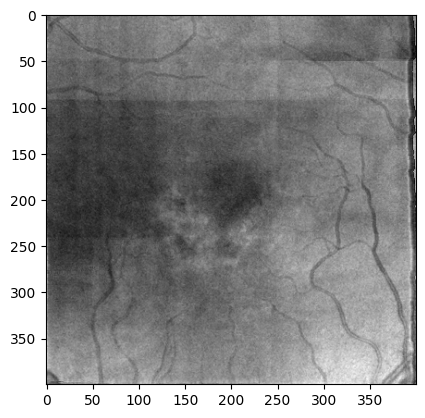

		 10073.bmp
2)



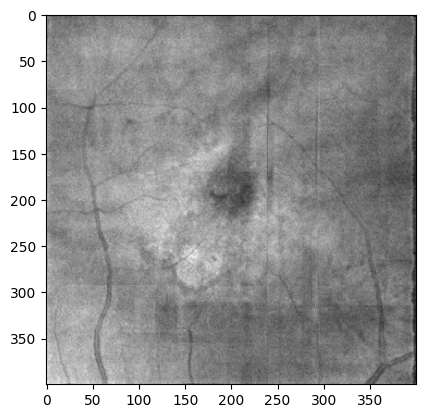

		 10064.bmp
3)



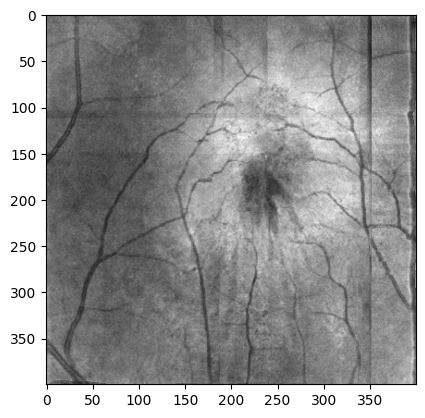

		 10288.bmp


In [9]:
#showing random 3 sample images
np.random.seed(420)
for i in range(3): #print 5 sample images
  k = np.random.choice(range(total_images))
  image_file = os.listdir(image_folder)[k]
  image = cv2.imread(os.path.join(image_folder,image_file)) #getting an image file
  print("%i)\n"%(i+1))
  plt.imshow(image)
  plt.show()
  print("\t\t",image_file) #the image file name

In [10]:
print(image.shape)

(400, 400, 3)


In [11]:
report_file = "/content/drive/MyDrive/OCT/data/description.xlsx"
text = pd.read_excel(io=report_file)
def get_df():
    """
        根据输入的图像和文本数据构建dataframe。
    """
    img = []
    findings = text["finding"].tolist()
    impressions = text["impression"].tolist()
    for file in tqdm(os.listdir(image_folder)):
        img_file = os.path.join(image_folder,file)
        img.append(img_file)
    df = pd.DataFrame({"image":img,"finding":findings,"impression":impressions})
    return df

In [12]:
df = get_df()
print(df.shape)
df.to_pickle("/content/drive/MyDrive/OCT/data/df.pkl")

100%|██████████| 300/300 [00:00<00:00, 384328.41it/s]

(300, 3)


In [14]:
df = pd.read_pickle("/content/drive/MyDrive/OCT/data/df.pkl")
df.head(5)

,image,finding,impression
0,/content/drive/MyDrive/OCT/data/image/10001.bmp,The macula area shows normal morphology and fe...,No active disease .
1,/content/drive/MyDrive/OCT/data/image/10002.bmp,The vascular network has no significant vascul...,"Normal vessel but abnormal FAZ , which may de..."
2,/content/drive/MyDrive/OCT/data/image/10003.bmp,The size of foveal avascular zone is normal bu...,Abnormal shape of the vascular area with few v...
3,/content/drive/MyDrive/OCT/data/image/10004.bmp,"In the center , there is a marked rupture and ...","Macular degeneration , no acute vessel abnorma..."
4,/content/drive/MyDrive/OCT/data/image/10005.bmp,Abnormal tangling and twisting of retinal bloo...,Diabetic Retinopathy with retinal hemorrhage .


1)



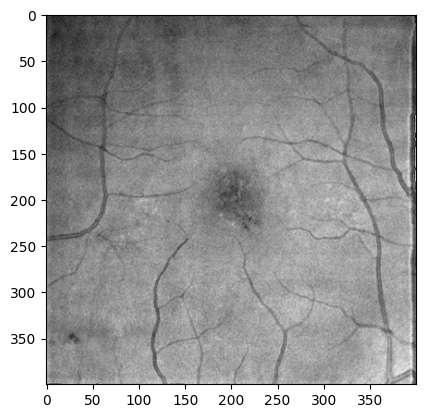


 Finding:  OD

 Impression:  OTHERS 


2)



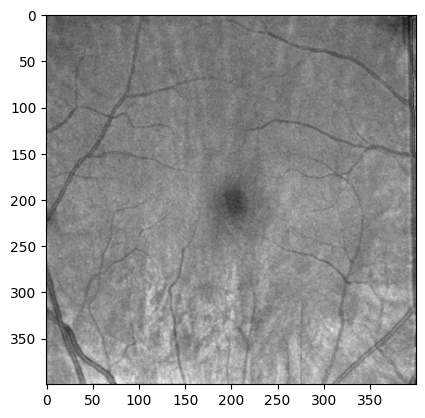


 Finding:  OD

 Impression:  NORMAL 


3)



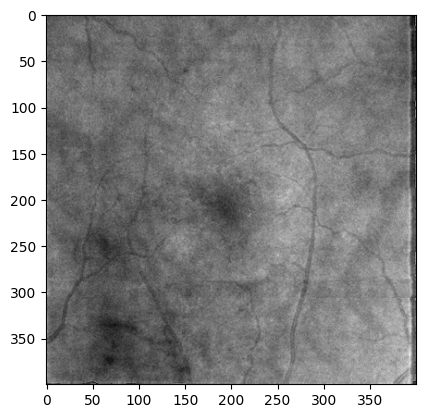


 Finding:  The central color of macula region is black , the size is deformed and diffused , there was significant distortion in the vascular area , there is a large black hemorrhage in the lower left corner of the image .

 Impression:  Other disease with distorted vascular area , bleeding spots and deformed vacula area . 




In [15]:
def show_image_captions(df = df,image_folder = image_folder,sample = 3):
  """
  given the df, samples datapoints and prints the images and caption
  df: dataframe
  image_folder: folder which contains images
  """
  k = df.sample(sample)
  i=1
  for index,row in k.iterrows():
    image = cv2.imread(row.get('image'))

    plt.imshow(image)
    print("%i)\n"%(i))
    i+=1
    plt.show() #printing the image
    print("\n","Finding: ",row.get('finding'))
    print("\n","Impression: ",row.get('impression'),"\n\n")
#showing sample 3 datapoints
show_image_captions()

<ipython-input-17-7857df150e6f>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  temp = df.loc[:,'impression'].str.replace(".","").str.replace(",","").copy() #removing all fullstops and storing the result in a temp variable


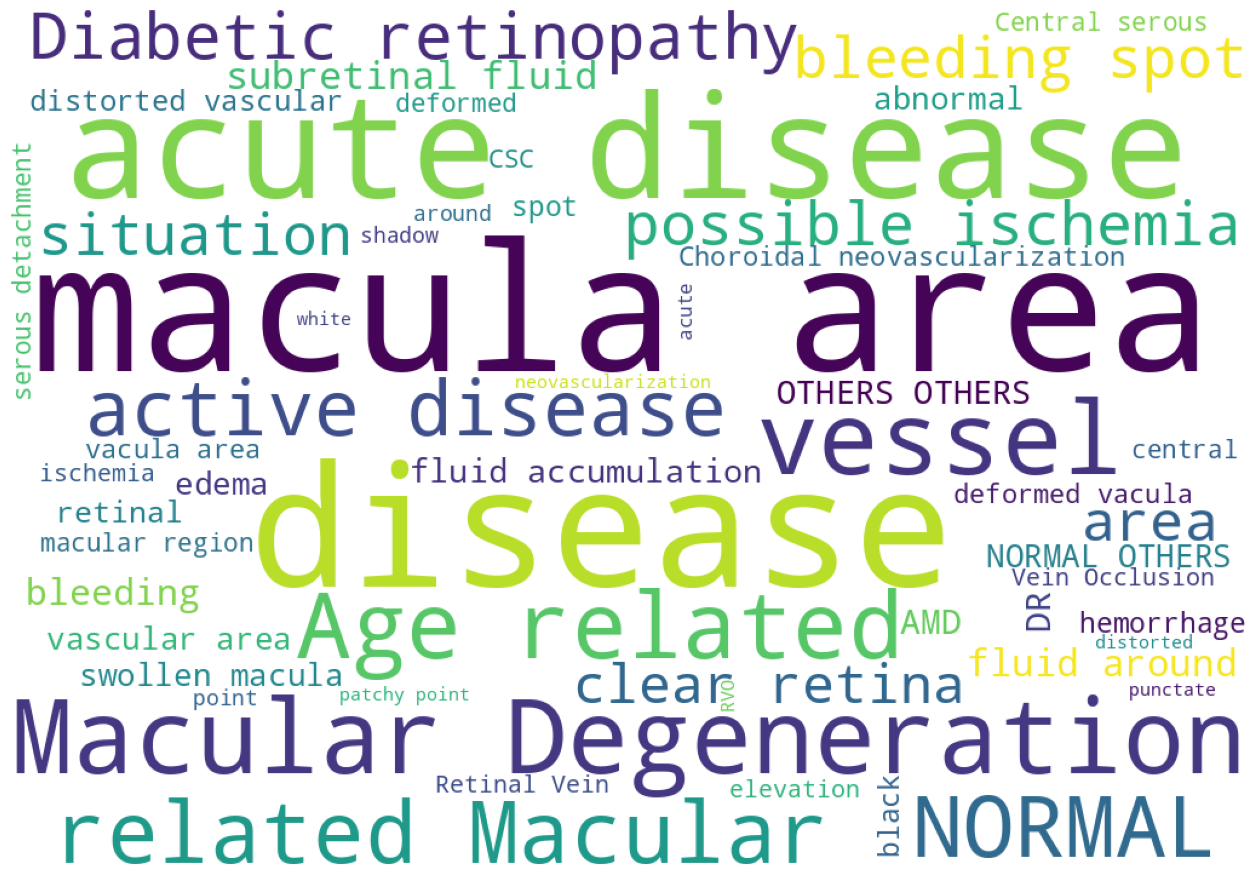

In [17]:
temp = df.loc[:,'impression'].str.replace(".","").str.replace(",","").copy() #removing all fullstops and storing the result in a temp variable
words = ""
for i in temp.values:
  k = i.split()
  words+= " ".join(k) + " "
word = words.strip()
wc = WordCloud(width = 1024, height = 720, 
                background_color ='white', 
                stopwords = STOPWORDS, 
                min_font_size = 15,).generate(word) 

del k,words,temp
plt.figure(figsize = (16,16))
plt.imshow(wc)
plt.axis("off")
plt.show()